<h1> DL Final Project Semester 1 2025</h1>
<span style="font-size:36px;">Presenter :</span> <span style="font-size:18px;">Ezra Ella 034199943</span><br>
<span style="font-size:36px;">Collaborator :</span> <span style="font-size:18px;">Bezalel Itzhaky 058750191</span>

<div dir="rtl" style="text-align: right;  padding-left: 50px; "> <ol><ol>  1.) בחר דאטהסט מתוך KAGGLE לפתרון בעיית  קלאסיפיקציה / רגרסיה / CLUSTERING
</ol></ol>
<ol><ol>2). בצע EDA לדאטה סט
</ol></ol>
<ol><ol>3). בצע PREPROCESSING לפי הנדרש :
<ol>
a. ניקוי נתונים
b. השלמת נתונים
c. הורדת מימדים
d. איזון הנתונים
e. נירמול
f. Feature engineering
</ol></ol></ol>
<ol><ol>4). חלק ל training / validation / test sets .</ol></ol>
<ol><ol>5). הפעל אלגוריתם למידת מכונה בסיסי לצורך השוואת התוצאות (עץ החלטה / SVM , Linear regression / K-means )</ol></ol>
<ol><ol>6). בחן את התוצאות שהתקבלו לפי 3-5 מדדים רלוונטיים</ol></ol>
<ol><ol>7). בחר רשת נוירונים רלוונטי ת והפעל אותה על הנתוני ם. יש לבחור אותה עם היפרפרמטרים המהווים ברירת מחדל . </ol></ol>
<ol><ol>8). השווה את התוצאות למדדים שהתקבלו בסעיף 6</ol></ol>
<ol><ol>9). בחר 3 היפרפרמטרים ובהתייחס לכל אחד מהם, שנה אותו ל 3 ערכים שונים ובחן את התוצאות.</ol></ol>
<ol><ol>10). שנה את הדאטהסט (הוסף רשומות / מחק רשומות ) כך שהתוצאות ישתפרו באופן משמעותי הסבר .</ol></ol>
<ol><ol>11). שנה את הדאטהסט (הוסף רשומות / מחק רשומות ) כך שהתוצאות יהיו פחות טובות באופן משמעותי הסבר.</ol></ol>
<ol><ol>12). הצע דרך לשיפור ארכיטקטורת הרשת, והראה כיצד זה משפיע על התוצאות ועל מהירות ההתכנסות</ol></ol>
<ol><ol>13). הצע מטריקה חדשה והראה מה הערכים שלה לאורך האימון.</ol></ol>
<ol><ol>14). שנה את האיזון (חוסר האיזון) של הנתונים ל 3 רמות שונות. השווה את התוצאות המתקבלות בכל אחד מהמקרים.</ol></ol>
<ol><ol>15). בחר שיטה להורדת מימדי ם, הפעל אותה על הדאטהסט והראה מהן התוצאות עבור הדאטהסט המצומצם.</ol></ol>
</div>


<h2> Project requirements description</h2>

In [1]:
# 
# %% [markdown]
# # Machine Learning Pipeline for Diseases and Symptoms Dataset
# 
# This notebook implements a complete ML pipeline for solving a classification problem using the Diseases and Symptoms Dataset from Kaggle.
# 
# The pipeline includes:
# 1. Dataset loading & exploratory data analysis (EDA)
# 2. Data preprocessing:
#    - Data cleaning
#    - Missing value imputation
#    - Dimensionality reduction
#    - Data balancing
#    - Normalization
#    - Feature engineering
# 3. Splitting data into training, validation, and test sets
# 4. Baseline model training (Decision Tree)
# 5. Neural network implementation (with default hyperparameters)
# 6. Hyperparameter tuning experiments
# 7. Dataset modifications (improvement and degradation)
# 8. Network architecture enhancements and convergence analysis
# 9. Adding a new metric (AUC)
# 10. Experimenting with data imbalance
# 11. Applying PCA for dimensionality reduction

# %%
# Import necessary libraries

<h1> utilities</h1>

<h2>print start project time</h2>

In [2]:
import time
from datetime import datetime
from datetime import timedelta
print("start run time",datetime.now().strftime("%H:%M:%S"))
start_time = time.time()

start run time 02:54:50


<h2> import libraries for setting seeds</h2>

In [3]:
import random
import tensorflow as tf

<h2> Function to reset seed values</h2>

In [4]:
def set_seed(seed_value=42):
    """
    Sets the seed for NumPy, Python's random module, and TensorFlow 
    to ensure reproducibility.
    
    Parameters:
    seed_value (int): The seed value to use for random number generation.
    """
    np.random.seed(seed_value)       # Set seed for NumPy
    random.seed(seed_value)          # Set seed for Python's random module
    tf.random.set_seed(seed_value)   # Set seed for TensorFlow

    #print(f"Seed set to: {seed_value}")

<h2>Function to Copy startify split before training and data manipulation </h2>

In [5]:
def copy_startify() :  
    return (
        X_train_strat.copy(),
        X_val_strat.copy(),
        X_test_strat.copy(),
        y_train_strat.copy(),
        y_val_strat.copy(),
        y_test_strat.copy()
    )

In [6]:
def copy_start_cat():
    return (
        y_train_cat.copy(),
        y_val_cat.copy(),
        y_test_cat.copy()
    )

<h1> Data Loading and preparation for training</h1>

<h2>. Dataset loading </h2>

<h3>import libraries </h3>

In [7]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split (03)
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.tree import DecisionTreeClassifier(03)
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import RandomForestClassifier(03)
# from sklearn.metrics import classification_report(03)
# from sklearn.metrics import confusion_matrix(03)
# from collections import Counter(03)

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical

# # For balancing (if needed)
# # !pip install imbalanced-learn  # Uncomment if imbalanced-learn is not installed
# # use it only at first run to install package: !pip install SMOTE
# # use it only at first run to install package:!pip install -U imbalanced-learn
# from imblearn.over_sampling import SMOTE
# from collections import Counter

<h3>load dataset from csv </h3>

In [8]:
Org_data_df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")
print("Kaggle Raw Dataset shape:", Org_data_df.shape)
print("Kaggle Raw Unique diseases count:", Org_data_df['diseases'].nunique())

Kaggle Raw Dataset shape: (246945, 378)
Kaggle Raw Unique diseases count: 773


<h3>print dataset head 5 rows </h3>

In [9]:
Org_data_df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<h3>print dataset tail 5 rows </h3>

In [10]:
Org_data_df.tail()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246944,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Select the top 22 as Sharon suggested</h2>

In [11]:
Org_class_counts = Org_data_df['diseases'].value_counts()

# Filter classes with at least 1210 samples
valid_classes = Org_class_counts[Org_class_counts >= 1210].index

# Create a new DataFrame H_Class by selecting only the valid classes
H_Class_df = Org_data_df[Org_data_df['diseases'].isin(valid_classes)]
# Print the new DataFrame class count
print(H_Class_df['diseases'].value_counts())
H_Class_df = H_Class_df.reset_index(drop=True)  # Reset index and drop the old index  

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
hypoglycemia                      1215
conjunctivitis due to allergy     1215
peripheral nerve disorder         1215
vaginal cyst                      1215
esophagitis                       1215
gastrointestinal hemorrhage       1214
diverticulitis                    1214
acute bronchitis                  1213
spontaneous abortion              1212
sprain or strain                  1212
infectious gastroenteritis        1212
fungal infection of the hair      1212
pneumonia                         1212
gout                              1211
arthritis of the hip              1210
marijuana abuse                   1210
strep throat                      1210
Name: count, dtype: int64


<h1>From Now on our project data is data_df the top 22 from Kaggle</h1>

In [12]:
data_df=H_Class_df.copy()
data_df.to_pickle("data_df.pkl")
data_df.to_csv('HClass.csv', index=False)

print("Our dataset originally contained", Org_class_counts.shape[0] ,"diseases, but we selected ",valid_classes.shape[0]," diseases to focus on. as shron suggested")
#print("our dataset had",Org_class_counts.shape[0]," diseases, we choose to work on",valid_classes.shape[0],"diseases")

#to show that indexes were reset and kast index is 267104
data_df.tail(5)

### **Freeing Memory by Removing Unnecessary Variables for Subsequent Cells**


Our dataset originally contained 773 diseases, but we selected  22  diseases to focus on. as shron suggested


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
26700,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26701,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26702,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26703,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26704,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
del H_Class_df
del Org_class_counts
del valid_classes

<h1>2. Data preprocessing: . Exploratory Data Analysis (EDA)</h1>

<h2>Print the information of the original (raw) data and the processed project data.</h2>

In [14]:
print("kaggle Raw dataset info")
print("********************")


print(Org_data_df.info())
print("********************")

print("Raw Dataset shape:\t", Org_data_df.shape)
print("Raw Unique diseases count:\t", Org_data_df['diseases'].nunique())
print("********************")
print("procecesd to top 22 diseases dataset info")
print("********************")


print(data_df.info())
print("********************")

print("processed shape:\t", data_df.shape)
print("processed Unique diseases count:", data_df['diseases'].nunique())

kaggle Raw dataset info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB
None
********************
Raw Dataset shape:	 (246945, 378)
Raw Unique diseases count:	 773
********************
procecesd to top 22 diseases dataset info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26705 entries, 0 to 26704
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 77.0+ MB
None
********************
processed shape:	 (26705, 378)
processed Unique diseases count: 22


<h2>describe the  numeric statistics of the processed project data </h2>

In [15]:
data_df.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.0,26705.000000,26705.000000,26705.0,...,26705.0,26705.0,26705.0,26705.0,26705.0,26705.0,26705.0,26705.0,26705.0,26705.0
mean,0.022131,0.022580,0.065643,0.044374,0.068414,0.065943,0.0,0.068040,0.022767,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.147111,0.148563,0.247662,0.205928,0.252460,0.248187,0.0,0.251819,0.149164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>describe the none  numeric statistics of the  processed project data </h2>

In [16]:
# For a specific column, let's say 'diseases'
frequency = data_df['diseases'].value_counts()

# To get the minimum frequency
min_frequency = frequency.min()
max_frequency = frequency.max()
min_freq_value = frequency.idxmin()
max_freq_value = frequency.idxmax()

print("max frequency is:",max_freq_value, "with trequecy of: ",max_frequency)
print("min frequency is:",min_freq_value, "with trequecy of: ",min_frequency)



data_df.describe(include='object')

max frequency is: cystitis with trequecy of:  1219
min frequency is: arthritis of the hip with trequecy of:  1210


,diseases
count,26705
unique,22
top,cystitis
freq,1219


<h2> use describe functio to create describe df and than add the least frequenxy</h2>

In [17]:
# # For categorical column, e.g. 'diseases'
# describe_df = data_df['diseases'].describe()

# # Add min_freq (min frequency) to describe output
# min_freq = data_df['diseases'].value_counts().min()
# describe_df['min_disease'] = min_freq_value
# describe_df['min_freq'] = min_freq

# #describe_df.rename(columns={'count': 'DF parameter'}, inplace=True)
# #describe_df.rename(columns={'count': 'DF parameter'}, inplace=True)


# #describe_df['count']= "DF parameter"
# print(describe_df)
# describe_df.info

In [18]:
del frequency
del max_freq_value
del max_frequency
del min_freq_value
del min_frequency

<h2> Plot the distribution of the top 22 disease in processed project data.</h2>

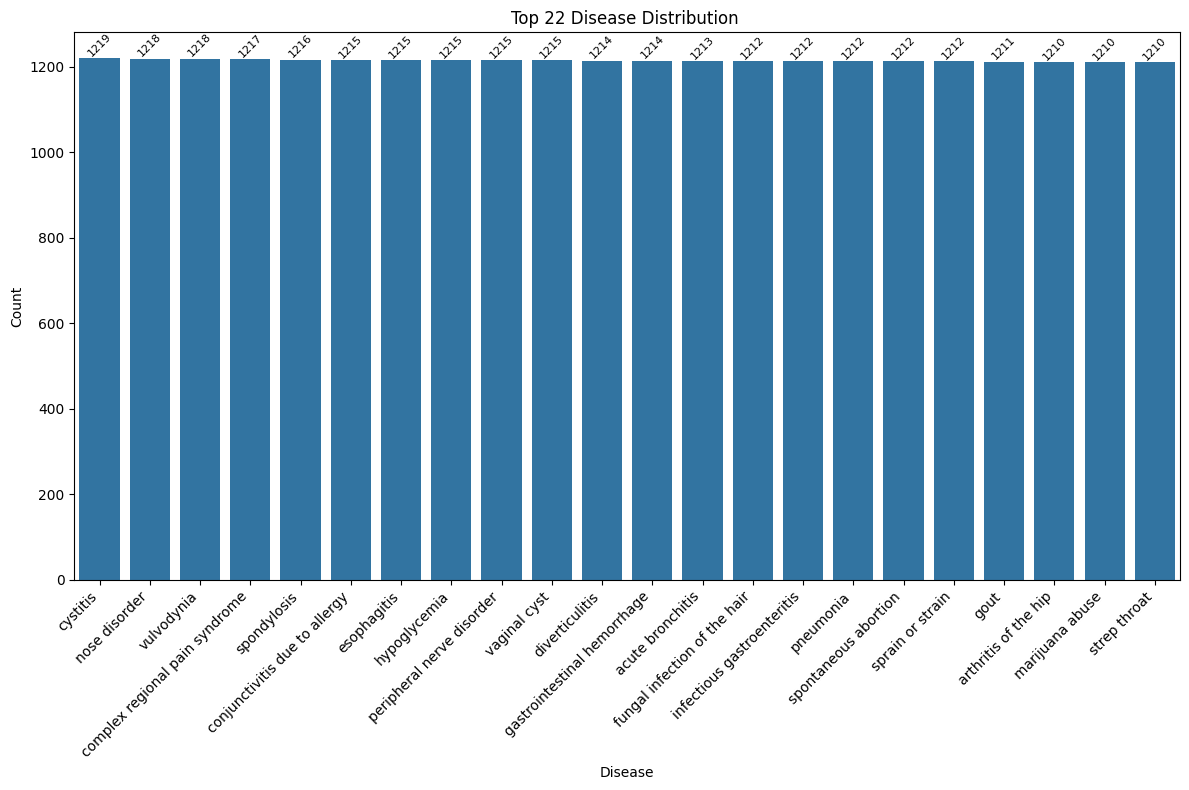

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get disease counts and sort by count (desc), then alphabetically
disease_counts = data_df['diseases'].value_counts()
sorted_diseases = disease_counts.sort_values(ascending=False).index  # Sort by count
sorted_diseases = sorted_diseases.to_list()
sorted_diseases.sort(key=lambda x: (-disease_counts[x], x))  # Sort ties alphabetically

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='diseases', data=data_df, order=sorted_diseases )

# Add count labels above bars 
for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, rotation=45)

plt.xticks(rotation=45, ha="right")
plt.title("Top 22 Disease Distribution ")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()


In [20]:
del container
del ax
del disease_counts

<h2> Display a table showing the distribution of the top 22 disease in processed project data.</h2>

In [21]:
# class_counts is obtained from value_counts() of column Diseases
class_counts = data_df['diseases'].value_counts()
#print(class_counts.shape)
# Convert to DataFrame
class_counts_df = class_counts.reset_index()
#print(class_counts_df.shape)
#print(class_counts)
# Rename columns
class_counts_df.columns = ['Disease', 'Count']

# Display the DataFrame
class_counts_df


,Disease,Count
0,cystitis,1219
1,nose disorder,1218
2,vulvodynia,1218
3,complex regional pain syndrome,1217
4,spondylosis,1216
5,hypoglycemia,1215
6,conjunctivitis due to allergy,1215
7,peripheral nerve disorder,1215
8,vaginal cyst,1215
9,esophagitis,1215


In [22]:
del class_counts
del class_counts_df

<h1>preapre X and Y and split it for modeles to train</h1>

<h2>separate to x and y</h2>

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

set_seed(42)


<h3> define the target and features col names</h3>

In [24]:
# Define the target column name
target_col = 'diseases'
# Define feature columns: exclude the target
feature_cols = [col for col in data_df.columns if col != target_col]

<h3> define X as our features DF</h3>

In [25]:
X = data_df[feature_cols]

<h3> y to One-Hot Encoding</h3>

<h3> step 1 :create a series of the target call it y_org</h3>

In [26]:
y_org = data_df[target_col]
# at this point our y col has the names of the diseses

<h3> step 2 :convert y_org to df call it y_org_df</h3>

In [27]:
y_org_df = y_org.reset_index()

<h3> step 3 : Determine the number of unique classes in `y`</h3>

In [28]:
class_counts = y_org_df['diseases'].nunique()  # Get number of unique classes
print(class_counts)

22


<h3> step 4 :Convert disease labels (strings) to integer labels</h3>

In [29]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_org_df['diseases'])

<h3>Step 5: Convert the integer labels to one-hot encoded format</h3>

In [30]:
y_org

0        infectious gastroenteritis
1        infectious gastroenteritis
2        infectious gastroenteritis
3        infectious gastroenteritis
4        infectious gastroenteritis
                    ...            
26700                  strep throat
26701                  strep throat
26702                  strep throat
26703                  strep throat
26704                  strep throat
Name: diseases, Length: 26705, dtype: object

In [31]:
y_cat = to_categorical(y_encoded, num_classes=class_counts)
print("y_org.shape",y_org.shape) # Extracted from the dataset
print("y_org_df.shape",y_org_df.shape)# convert it to DF
print("y_encoded.shape",y_encoded.shape)# diseses names encoded as integers
print("y_cat.shape",y_cat.shape)#converted to one-hot encoding

y_org.shape (26705,)
y_org_df.shape (26705, 2)
y_encoded.shape (26705,)
y_cat.shape (26705, 22)


In [32]:
y_org_df

,index,diseases
0,0,infectious gastroenteritis
1,1,infectious gastroenteritis
2,2,infectious gastroenteritis
3,3,infectious gastroenteritis
4,4,infectious gastroenteritis
...,...,...
26700,26700,strep throat
26701,26701,strep throat
26702,26702,strep throat
26703,26703,strep throat


In [33]:
y_encoded

array([11, 11, 11, ..., 19, 19, 19])

In [34]:
y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
del target_col
del feature_cols
del y_org


<h2>simple split to train test and validation</h2>

In [36]:
from sklearn.model_selection import train_test_split
set_seed(42)

In [37]:

X_train_simple, X_temp_simple, y_train_simple, y_temp_simple = train_test_split(X, y_encoded, test_size=0.3, random_state=42,shuffle=False)
X_val_simple, X_test_simple, y_val_simple, y_test_simple = train_test_split(X_temp_simple, y_temp_simple, test_size=0.5, random_state=42,shuffle=False)

print("sets shapes  per simple split")
print("Training set:\t", X_train_simple.shape, y_train_simple.shape)
print("Validation set:\t", X_val_simple.shape, y_val_simple.shape)
print("Test set:\t", X_test_simple.shape, y_test_simple.shape)

sets shapes  per simple split
Training set:	 (18693, 377) (18693,)
Validation set:	 (4006, 377) (4006,)
Test set:	 (4006, 377) (4006,)


In [38]:
del(X_temp_simple)
del(y_temp_simple)

<h2> stratify split to train test and validation</h2>

In [39]:
set_seed(42)
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify=y_temp_strat)

print("sets shapes per stratify split")
print("Training set:\t", X_train_strat.shape, y_train_strat.shape)
print("Validation set:\t", X_val_strat.shape, y_val_strat.shape)
print("Test set:\t", X_test_strat.shape, y_test_strat.shape)



#class_counts = y_train_strat['diseases'].nunique()  # Get number of unique classes
#class_counts = y_train_strat.nunique()
class_counts = len(np.unique(y_train_strat))



# y to One-Hot Encoding
y_train_cat = to_categorical(y_train_strat, num_classes=class_counts)
y_val_cat = to_categorical(y_val_strat, num_classes=class_counts)
y_test_cat = to_categorical(y_test_strat, num_classes=class_counts)


sets shapes per stratify split
Training set:	 (18693, 377) (18693,)
Validation set:	 (4006, 377) (4006,)
Test set:	 (4006, 377) (4006,)


In [40]:
del(X_temp_strat)
del(y_temp_strat)

In [41]:
y_tr_cat,y_va_cat,y_te_cat= copy_start_cat()
print(y_tr_cat.shape,y_va_cat.shape,y_te_cat.shape)
import pandas as pd

y_tr_cat_df = pd.DataFrame(y_tr_cat)
print(y_tr_cat_df.info())


(18693, 22) (4006, 22) (4006, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18693 entries, 0 to 18692
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18693 non-null  float64
 1   1       18693 non-null  float64
 2   2       18693 non-null  float64
 3   3       18693 non-null  float64
 4   4       18693 non-null  float64
 5   5       18693 non-null  float64
 6   6       18693 non-null  float64
 7   7       18693 non-null  float64
 8   8       18693 non-null  float64
 9   9       18693 non-null  float64
 10  10      18693 non-null  float64
 11  11      18693 non-null  float64
 12  12      18693 non-null  float64
 13  13      18693 non-null  float64
 14  14      18693 non-null  float64
 15  15      18693 non-null  float64
 16  16      18693 non-null  float64
 17  17      18693 non-null  float64
 18  18      18693 non-null  float64
 19  19      18693 non-null  float64
 20  20      18693 non-null  float64
 21  2

<h3>Creating a Copy of the Stratified Split to Maintain the Original Structure</h3>

In [42]:
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

<h1> Tree model</h1>

<h2> create a tree for both splits and evaluate</h2>

<h3>import relevant libraries</h3>

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from collections import Counter
set_seed(42)

<h3> create Tree Model Using Simple Split(default parameters) </h3>

In [44]:

#here we are not initializing vars for startification split
X_train_Def=X_train_simple.copy()
X_val_Def=X_val_simple.copy()
X_test_Def=X_test_simple.copy()
y_train_Def=y_train_simple.copy()
y_val_Def=y_val_simple.copy()
y_test_Def=y_test_simple.copy()
# # Train Decision Tree Classifier
clf_simple = DecisionTreeClassifier()
clf_simple.fit(X_train_Def, y_train_Def)
y_pred_simple = clf_simple.predict(X_test_Def)

<h4>Print classification report for the Tree Model Using Simple Split</h4>

In [45]:
# Compute and print evaluation metrics
#since our split is not startifies and has bad test support distribution between classes  we used average='weighted'

## Compute the baseline model metrics ## 
accuracy_simple = accuracy_score(y_test_Def, y_pred_simple) * 100
Precision_simple=precision_score(y_test_Def, y_pred_simple, average='weighted', zero_division=1) * 100
Recall_simple=recall_score(y_test_Def, y_pred_simple, average='weighted', zero_division=1) * 100
F1_simple=f1_score(y_test_Def, y_pred_simple, average='weighted', zero_division=1)

## print print("Classification Report:") ## 
print(classification_report(y_test_Def, y_pred_simple, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           4       0.00      1.00      0.00       0.0
           7       0.00      1.00      0.00       0.0
           8       0.00      1.00      0.00       0.0
           9       0.00      1.00      0.00       0.0
          10       0.00      1.00      0.00       0.0
          11       0.00      1.00      0.00       0.0
          13       0.00      1.00      0.00       0.0
          14       1.00      0.00      0.00    1215.0
          15       0.00      1.00      0.00       0.0
          16       0.00      1.00      0.00       0.0
          17       1.00      0.00      0.00    1212.0
          18       1.00      0.00      0.00     369.0
          19       1.00      0.00      0.00    1210.0
          20       0.00      1.00      0.00       0.0
          21       0.00    

<h4>Print Metrics for the Tree Model Using simple Split</h4>

In [46]:
## print the baseline model metrics ## 
print("\n=== Evaluation Metrics for the Tree Model Using Simple Split ===")
print("Accuracy: {:.2f}%".format(accuracy_simple))
print("Precision: {:.2f}%".format(Precision_simple))
print("Recall: {:.2f}%".format(Recall_simple))
print("F1 Score (macro): {:.4f}".format(F1_simple))


=== Evaluation Metrics for the Tree Model Using Simple Split ===
Accuracy: 0.00%
Precision: 100.00%
Recall: 0.00%
F1 Score (macro): 0.0000


<h2>Create DF of metrics</h2>

In [47]:
import pandas as pd

# Example data
models = ["Simple split"]

accuracy_simple
Precision_simple
Recall_simple
F1_simple, 

# Create DataFrame
metrics_data = {
    "Model": models,
    "Accuracy": [accuracy_simple],
    "Precision": [Precision_simple],
    "Recall": [Recall_simple],
    "F1 Score": [F1_simple]
}

df_metrics = pd.DataFrame(metrics_data)
# Apply formatting using .map() instead of .applymap()
df_metrics["Accuracy"] = df_metrics["Accuracy"].map(lambda x: f"{x:.2f}%")
df_metrics["Precision"] = df_metrics["Precision"].map(lambda x: f"{x:.2f}%")
df_metrics["Recall"] = df_metrics["Recall"].map(lambda x: f"{x:.2f}%")

# # Align "Model" column to the left (for Jupyter Notebook)
df_styled = df_metrics.style.set_properties(subset=["Model"], **{'text-align': 'left'})

# # Display in Jupyter Notebook
df_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Simple split,0.00%,100.00%,0.00%,0.0


<h4> Overview of simple(defalut) Model Evaluation</h4>

=== Evaluation Metrics for the Tree Model Using Simple Split ===<ol>
Accuracy: 0.00%
Precision: 100.00%
Recall: 0.00%
F1 Score (macro): 0.0000</ol>
These metrics indicate a completely dysfunctional model that is likely making extreme misclassifications.<ol>
    Accuracy: 0.00% → The model is always wrong; it never makes a correct prediction.</ol><ol>
    Precision: 100.00% → When the model does make a positive prediction, it is always correct (but this is misleading).</ol><ol>
    Recall: 0.00% → The model never predicts the actual positive class. It likely predicts only negatives.</ol><ol>
    F1 Score: 0.0000 → Since recall is 0, the F1 score is also 0, meaning the model is completely ineffective.</ol></ol><ol>

In [48]:
del X_test_Def
del X_test_simple
del y_test_Def


del X_train_Def
del X_train_simple
del y_train_Def
del y_train_simple

del X_val_Def
del X_val_simple
del y_pred_simple
del y_val_Def
del y_val_simple


<h3> create Tree Model Using Startify Split </h3>

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#since our split is  startifies and has good support distribution between classes  we used average='macro'
set_seed(42)


In [50]:
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
# # Train Decision Tree Classifier
clf_strat = DecisionTreeClassifier()
clf_strat.fit(X_train, y_train)
y_pred_strat = clf_strat.predict(X_test)

<h4>Print classification report for the Tree Model Using startify Split</h4>

In [51]:

# Compute the baseline model metrics
Accuracy_strat = accuracy_score(y_test, y_pred_strat) * 100
Precision_strat = precision_score(y_test, y_pred_strat, average='macro', zero_division=1) * 100
Recall_strat = recall_score(y_test, y_pred_strat, average='macro', zero_division=1) * 100
F1_strat = f1_score(y_test, y_pred_strat, average='macro', zero_division=1)

 

# Print classification report
print("\nClassification Report for tree based on startified split:")
print(classification_report(y_test, y_pred_strat, zero_division=1))



Classification Report for tree based on startified split:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       182
           1       0.98      0.99      0.98       181
           2       0.92      0.88      0.90       182
           3       1.00      1.00      1.00       182
           4       0.99      0.99      0.99       183
           5       0.95      0.97      0.96       182
           6       0.98      0.97      0.98       182
           7       1.00      0.99      1.00       182
           8       0.99      0.99      0.99       182
           9       0.98      0.99      0.99       182
          10       1.00      0.99      0.99       183
          11       0.97      0.95      0.96       182
          12       1.00      0.99      1.00       182
          13       0.97      0.98      0.98       182
          14       0.96      0.97      0.96       183
          15       0.93      0.87      0.90       182
          16       0.9

<h3>=== Evaluation Metrics: Tree Model Using Stratified Split ===</h3>
Accuracy: 95.26%
Precision: 95.27%
Recall: 95.26%
F1 Score (weighted): 0.9525

<h4>Print Metrics for the Tree Model Using startify Split</h4>

In [52]:
# Print the baseline model metrics
print("\n=== Evaluation Metrics for the Tree Model Using Stratified Split ===")
print("Accuracy: {:.2f}%".format(Accuracy_strat))  
print("Precision: {:.2f}%".format(Precision_strat))  
print("Recall: {:.2f}%".format(Recall_strat))  
print("F1 Score (weighted): {:.4f}".format(F1_strat)) 


=== Evaluation Metrics for the Tree Model Using Stratified Split ===
Accuracy: 95.56%
Precision: 95.57%
Recall: 95.56%
F1 Score (weighted): 0.9555


In [53]:
new_row = {
    'Model': 'Stratify split',
    'Accuracy': Accuracy_strat,
    'Precision': Precision_strat,
    'Recall': Recall_strat,
    'F1 Score': F1_strat
}
df_metrics.loc[len(df_metrics)] = new_row

# Format  Accuracy, Precision, Recall, also F1 Score
columns_to_format = ["Accuracy", "Precision", "Recall" , "F1 Score"]  

df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (
    df_metrics.loc[len(df_metrics) - 1, columns_to_format]
    .astype(float)  # Ensure numeric type
    .map(lambda x: f"{x:.2f}%")  # Format as percentage
)

print(df_metrics)


            Model Accuracy Precision  Recall F1 Score
0    Simple split    0.00%   100.00%   0.00%      0.0
1  Stratify split   95.56%    95.57%  95.56%    0.96%


C:\Users\Bentzii\AppData\Local\Temp\ipykernel_1164\576878507.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.96%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (


<h4> Overview of Stratified Model Evaluation</h4>
These metrics indicate a well-performing model with strong predictive power. <ol>
Accuracy (95.56%) → The model correctly classifies 95.56% of all instances, meaning it's highly reliable overall.</ol><ol>
Precision (95.57%) → When the model predicts a positive class, it's correct 95.57% of the time. This suggests low false positives.</ol><ol>
Recall (95.56%) → The model successfully identifies 95.56% of all actual positive cases, meaning low false negatives.</ol><ol>
F1 Score (0.955) → A high F1 score confirms a strong balance between precision and recall.</ol>
Interpretation:<ol>
This model is highly effective, with consistent performance across precision, recall, and accuracy.</ol><ol>
There’s no major bias towards false positives or false negatives, which is ideal for most applications.

<h3> Compare the Performance of Simple vs. Stratified Split</h3>

In [54]:
if accuracy_simple > Accuracy_strat:
    print("accuracy_simple is better")
else:
    print(f"accuracy_strat is better it is {Accuracy_strat:.2f}%")

if Precision_simple > Precision_strat:
    print(f"Precision_simple is better it is {Precision_simple:.2f}%")
else:
    print(f"Precision_strat is better it is {Precision_strat:.2f}%")

if Recall_simple > Recall_strat:
    print("Recall_simple is better")
else:
    print(f"Recall_strat is better it is {Recall_strat:.2f}%")
if F1_simple > F1_strat:
    print("F1_simple is better")
else:
    print(f"F1_strat is better it is {F1_strat:.2f}")
print ("Stratification performs better across all metrics except precision, so we will proceed with stratified splitting.")


accuracy_strat is better it is 95.56%
Precision_simple is better it is 100.00%
Recall_strat is better it is 95.56%
F1_strat is better it is 0.96
Stratification performs better across all metrics except precision, so we will proceed with stratified splitting.


In [55]:
del accuracy_simple
del clf_simple

<h3>heatmap of Decision tree confusion Matrix Using Stratified Split</h3>

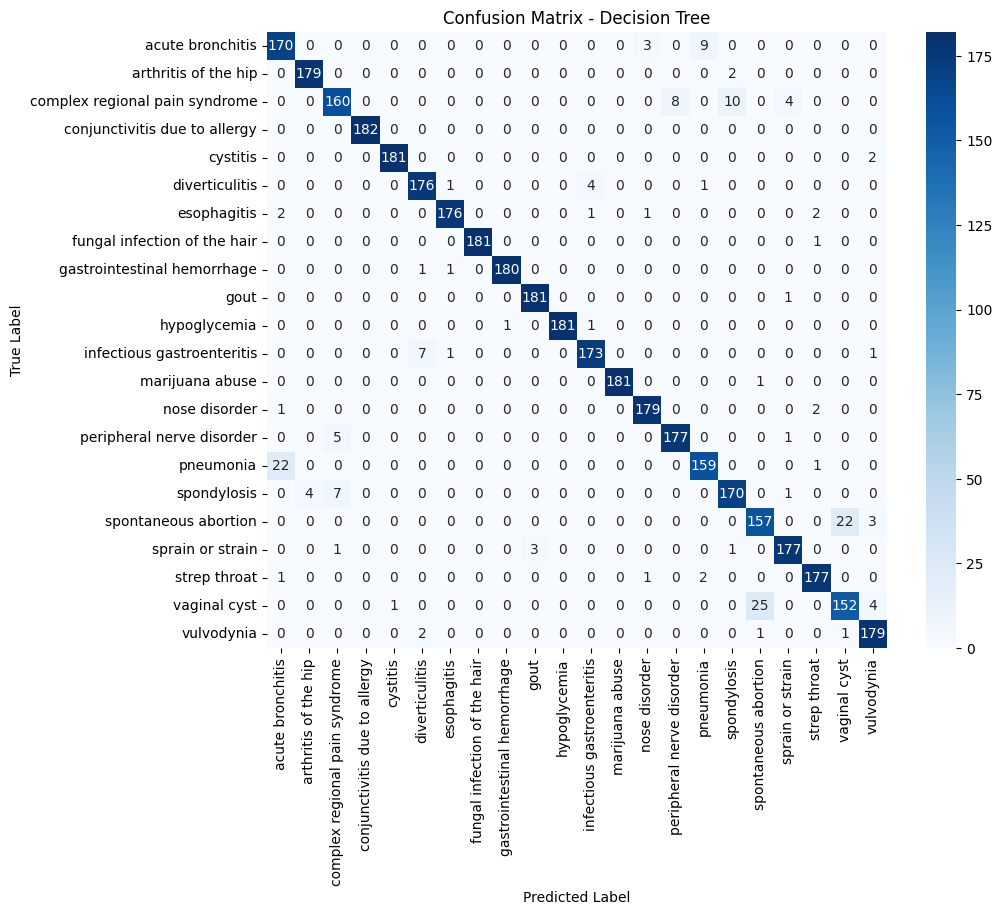

In [56]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_strat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(sorted_diseases)), yticklabels=sorted(set(sorted_diseases)))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [57]:
#del sorted_diseases

<h1>Neural Network with Default Hyperparameters</h1>

<h2>default running parameters</h2>

In [58]:
epoch=50
batch=32

<h2>import relevant libraries and set random seed</h2>

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

from tensorflow.keras.callbacks import EarlyStopping

#from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Recall
from tensorflow.keras.utils import to_categorical


<h2> Train the NN with default Hyperparameters early_stop monitor='val_recall'</h2>

<h3>define the model</h3>

In [60]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

In [61]:
# Define a simple MLP model
model_Recal = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer to define input shape
    Dense(64, activation='relu'), # Remove input_shape from Dense layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(class_counts, activation='softmax')
])
model_Recal.compile(optimizer='adam',                    
             loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Recall(name="recall")])

<h3> Train the model with early stopping </h3>

In [62]:
## Train the model with early stopping (rest of your training code remains the same)
early_stop = EarlyStopping(monitor='val_recall', patience=5, mode='max', restore_best_weights=True)

history_Recal= model_Recal.fit(X_train , y_tr_cat ,
                    epochs=epoch,
                    batch_size=batch,
                    validation_data=(X_val , y_v_cat ),
                    callbacks=[early_stop])


Epoch 1/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6614 - loss: 1.5732 - recall: 0.3671 - val_accuracy: 0.9631 - val_loss: 0.0905 - val_recall: 0.9571
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1171 - recall: 0.9481 - val_accuracy: 0.9626 - val_loss: 0.0686 - val_recall: 0.9601
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9598 - loss: 0.0953 - recall: 0.9541 - val_accuracy: 0.9641 - val_loss: 0.0642 - val_recall: 0.9613
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.0824 - recall: 0.9576 - val_accuracy: 0.9656 - val_loss: 0.0617 - val_recall: 0.9628
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.0792 - recall: 0.9590 - val_accuracy: 0.9643 - val_loss: 0.0614 - val_recall: 0.9621
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.0759 - recall: 0.9603 - val_accuracy: 0.9598 - val_loss: 0.0621 - val_recall: 0.9586
Epoc

<h3>Evaluate the model</h3>

In [63]:
# Evaluate on test set (rest of your evaluation code remains the same)
results = model_Recal.evaluate(X_test, y_tst_cat, verbose=0)
print("Neural Network Test Loss: {:.4f}".format(results[0]))  # Loss
print("Neural Network Test Accuracy: {:.2%}".format(results[1]))  # Accuracy
print("Neural Network Test Recall: {:.2%}".format(results[2]))  # Recall

# nn_loss, nn_accuracy = model_Recal.evaluate(X_test , y_tst_cat , verbose=0)
# print("Neural Network Test Accuracy: {:.2%}".format(nn_accuracy))

Neural Network Test Loss: 0.0644
Neural Network Test Accuracy: 96.16%
Neural Network Test Recall: 95.86%


<h3> classification reprt NN with default Hyperparameters early_stop monitor='val_recall'</h3>

In [64]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

In [65]:
from sklearn.metrics import classification_report
# Get model predictions
y_pred_prob = model_Recal.predict(X_test)  # Get probability outputs
y_pred_NN_Recall = y_pred_prob.argmax(axis=1)  # Convert probabilities to class labels

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<h3>Print classification report for NN with default Hyperparameters early_stop monitor='val_recal'</h3>

In [66]:
Accuracy_NN_Recal = accuracy_score(y_test, y_pred_NN_Recall) * 100
Precision_NN_Recal=precision_score(y_test, y_pred_NN_Recall, average='macro') * 100
Recall_NN_Recal=recall_score(y_test, y_pred_NN_Recall, average='macro') * 100
F1_NN_Recal=f1_score(y_test, y_pred_NN_Recall, average='macro')

# Compute and print evaluation metrics
print("\n=== Model Evaluation Metrics ===")
print("Accuracy: {:.2f}%".format(Accuracy_NN_Recal))
print("Precision: {:.2f}%".format(Precision_NN_Recal))
print("Recall: {:.2f}%".format(Recall_NN_Recal))
print("F1 Score (macro): {:.4f}".format(F1_NN_Recal))

#print("Classification Report:")
print("Default NN_Recall Performance:")


# Compute precision, recall, and F1-score
print(classification_report(y_test, y_pred_NN_Recall))


=== Model Evaluation Metrics ===
Accuracy: 96.16%
Precision: 96.35%
Recall: 96.15%
F1 Score (macro): 0.9613
Default NN_Recall Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.98      0.97      0.98       181
           2       0.92      0.91      0.91       182
           3       1.00      1.00      1.00       182
           4       1.00      0.98      0.99       183
           5       0.95      0.99      0.97       182
           6       0.97      0.98      0.98       182
           7       1.00      1.00      1.00       182
           8       0.99      0.99      0.99       182
           9       1.00      0.99      0.99       182
          10       1.00      0.99      0.99       183
          11       0.99      0.95      0.97       182
          12       1.00      1.00      1.00       182
          13       0.99      0.97      0.98       182
          14       0.95      0.98      0.96      

<h3> add this model NN_Recal results to metric df</h3>

In [67]:
new_row = {
    'Model': 'Defult NN Recall',
    'Accuracy': Accuracy_NN_Recal,
    'Precision': Precision_NN_Recal,
    'Recall': Recall_NN_Recal,
    'F1 Score': F1_NN_Recal
}
df_metrics.loc[len(df_metrics)] = new_row

# Format only Accuracy, Precision, Recall, and also F1 Score as a number
columns_to_format = ["Accuracy", "Precision", "Recall","F1 Score"]  # 
df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (
    df_metrics.loc[len(df_metrics) - 1, columns_to_format]
    .astype(float)  # Ensure numeric type
    .map(lambda x: f"{x:.2f}%")  # Format as percentage
)

print(df_metrics)

              Model Accuracy Precision  Recall F1 Score
0      Simple split    0.00%   100.00%   0.00%      0.0
1    Stratify split   95.56%    95.57%  95.56%    0.96%
2  Defult NN Recall   96.16%    96.35%  96.15%    0.96%


<h3>pc time</h3>

In [68]:
print("end of main",datetime.now().strftime("%H:%M:%S"))
end_time = time.time()
elapsed_time = end_time - start_time# Calculates the total time taken in seconds.
print(f"Total execution time: {elapsed_time:.2f} seconds")#  Displays the execution time, rounded to 2 decimal places.
formatted_elapsed_time = str(timedelta(seconds=elapsed_time))
print(f"Total execution time: {formatted_elapsed_time}")

end of main 02:55:19
Total execution time: 29.12 seconds
Total execution time: 0:00:29.121089


<h2> Train the NN with default Hyperparameters early_stop monitor='val_loss'</h2>

In [69]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

<h3>define the model</h3>

In [70]:
model_Loss = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer to define input shape
    Dense(64, activation='relu'), # Remove input_shape from Dense layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(class_counts, activation='softmax')
])

model_Loss.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

<h3> Train the model with early stopping</h3>

In [71]:
# Train the model with early stopping 
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#print(X_train.shape,y_train.shape)
history_Loss= model_Loss.fit(X_train , y_tr_cat ,
                    epochs=epoch,
                    batch_size=batch,
                    validation_data=(X_val ,  y_v_cat ),
                    callbacks=[early_stop])

# Evaluate on test set (rest of your evaluation code remains the same)
nn_loss, nn_accuracy = model_Loss.evaluate(X_test , y_tst_cat , verbose=0)
print("Neural Network Test Accuracy: {:.2%}".format(nn_accuracy))

Epoch 1/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6591 - loss: 1.5850 - val_accuracy: 0.9631 - val_loss: 0.0905
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1171 - val_accuracy: 0.9626 - val_loss: 0.0686
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.0954 - val_accuracy: 0.9641 - val_loss: 0.0642
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.0824 - val_accuracy: 0.9656 - val_loss: 0.0617
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.0792 - val_accuracy: 0.9643 - val_loss: 0.0614
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.0759 - val_accuracy: 0.9598 - val_loss: 0.0621
Epoch 7/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.0726 - val_accuracy: 0.9638 - val_loss: 0.0623
Epoch 8/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9640 - loss: 0.0730 - val_accuracy: 0.

<h3> classification reprt NN with default Hyperparameters early_stop monitor='val_loss'</h3>

In [72]:
from sklearn.metrics import classification_report
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
# Get model predictions
y_pred_prob = model_Loss.predict(X_test)  # Get probability outputs
y_pred_NN_Loss = y_pred_prob.argmax(axis=1)  # Convert probabilities to class labels

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<h3>Print classification report for NN with default Hyperparameters early_stop monitor='val_loss'</h3>

In [73]:
Accuracy_NN_Loss = accuracy_score(y_test, y_pred_NN_Loss) * 100
Precision_NN_Loss=precision_score(y_test, y_pred_NN_Loss, average='macro') * 100
Recall_NN_Loss=recall_score(y_test, y_pred_NN_Loss, average='macro') * 100
F1_NN_Loss=f1_score(y_test, y_pred_NN_Loss, average='macro')

# Compute and print evaluation metrics
print("\n=== Model Evaluation Metrics ===")
print("Accuracy: {:.2f}%".format(Accuracy_NN_Loss))
print("Precision: {:.2f}%".format(Precision_NN_Loss))
print("Recall: {:.2f}%".format(Recall_NN_Loss))
print("F1 Score (macro): {:.4f}".format(F1_NN_Loss))

#print("Classification Report:")
print("Default NN_Loss Performance:")


# Compute precision, recall, and F1-score
print(classification_report(y_test, y_pred_NN_Loss))


=== Model Evaluation Metrics ===
Accuracy: 96.01%
Precision: 96.10%
Recall: 96.00%
F1 Score (macro): 0.9597
Default NN_Loss Performance:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       182
           1       0.99      0.98      0.99       181
           2       0.96      0.88      0.92       182
           3       1.00      1.00      1.00       182
           4       1.00      0.98      0.99       183
           5       0.97      0.97      0.97       182
           6       0.98      0.99      0.98       182
           7       1.00      1.00      1.00       182
           8       1.00      0.99      1.00       182
           9       0.99      0.99      0.99       182
          10       1.00      1.00      1.00       183
          11       0.96      0.97      0.96       182
          12       1.00      1.00      1.00       182
          13       0.96      0.98      0.97       182
          14       0.94      0.99      0.97       1

In [74]:
print(df_metrics)

              Model Accuracy Precision  Recall F1 Score
0      Simple split    0.00%   100.00%   0.00%      0.0
1    Stratify split   95.56%    95.57%  95.56%    0.96%
2  Defult NN Recall   96.16%    96.35%  96.15%    0.96%


<h3> add  modelloss results to metric df</h3>

In [75]:
new_row = {
    'Model': 'Defult NN Loss',
    'Accuracy': Accuracy_NN_Loss,
    'Precision': Precision_NN_Loss,
    'Recall': Recall_NN_Loss,
    'F1 Score': F1_NN_Loss
}
df_metrics.loc[len(df_metrics)] = new_row

# Format only Accuracy, Precision, Recall, and also F1 Score as a number
columns_to_format = ["Accuracy", "Precision", "Recall","F1 Score"]  # 
df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (
    df_metrics.loc[len(df_metrics) - 1, columns_to_format]
    .astype(float)  # Ensure numeric type
    .map(lambda x: f"{x:.2f}%")  # Format as percentage
)

print(df_metrics)

              Model Accuracy Precision  Recall F1 Score
0      Simple split    0.00%   100.00%   0.00%      0.0
1    Stratify split   95.56%    95.57%  95.56%    0.96%
2  Defult NN Recall   96.16%    96.35%  96.15%    0.96%
3    Defult NN Loss   96.01%    96.10%  96.00%    0.96%


<h2> Train the NN with default Hyperparameters early_stop monitor='val_auc'</h2>

<h3>define the model</h3>

In [76]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

In [77]:
# Define a simple MLP model
model_AUC = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer to define input shape
    Dense(64, activation='relu'), # Remove input_shape from Dense layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(class_counts, activation='softmax')
])
import tensorflow as tf

model_AUC.compile(optimizer='adam',                    
             loss='categorical_crossentropy',
             metrics=['accuracy', 
                      tf.keras.metrics.Recall(name="recall"),
                      tf.keras.metrics.AUC(name="auc")])  # הוספת AUC


<h3> Train the model with early stopping</h3>

In [78]:
# Train the model with early stopping 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', 
                                              patience=5, 
                                              mode='max',
                                              restore_best_weights=True)

#print(X_train.shape,y_train.shape)
history_AUC = model_AUC.fit(X_train , y_tr_cat ,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val ,  y_v_cat ),
                    callbacks=[early_stop])

# Evaluate on test set (rest of your evaluation code remains the same)

results = model_AUC.evaluate(X_test, y_tst_cat, verbose=0)
print("Evaluation Results:", results)
# nn_AUC_Loss,nn_AUC_Accuracy, nn_AUC_Auc = model_AUC.evaluate(X_test , y_tst_cat , verbose=0)

nn_AUC_loss = results[0]   # ההפסד (categorical_crossentropy)
nn_AUC_accuracy= results[1]  # דיוק
nn_AUC_recall = results[2]  # Recall
nn_AUC_auc = results[3]
# int("Neural Network Test Accuracy: {:.2%}".format(nn_AUC_accuracy))

Epoch 1/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6630 - auc: 0.9231 - loss: 1.5702 - recall: 0.3672 - val_accuracy: 0.9631 - val_auc: 0.9999 - val_loss: 0.0905 - val_recall: 0.9571
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - auc: 0.9997 - loss: 0.1171 - recall: 0.9481 - val_accuracy: 0.9626 - val_auc: 0.9999 - val_loss: 0.0686 - val_recall: 0.9601
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - auc: 0.9998 - loss: 0.0953 - recall: 0.9541 - val_accuracy: 0.9641 - val_auc: 0.9999 - val_loss: 0.0642 - val_recall: 0.9613
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - auc: 0.9998 - loss: 0.0824 - recall: 0.9576 - val_accuracy: 0.9656 - val_auc: 0.9999 - val_loss: 0.0617 - val_recall: 0.9628
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9627 - auc: 0.9998 - loss: 0.0791 - recall: 0.9591 - val_accuracy: 0.9643 - val_auc: 0.9999 - val_loss: 0.0614 - val_recall: 0.9621
Epoch 6/50

<h3> classification reprt NN with default Hyperparameters early_stop monitor='val_auc'</h3>

In [79]:
from sklearn.metrics import classification_report
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
# Get model predictions
y_pred_prob = model_AUC.predict(X_test)  # Get probability outputs
y_pred_NN_AUC = y_pred_prob.argmax(axis=1)  # Convert probabilities to class labels

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step


<h3>Print classification report for NN with default Hyperparameters early_stop monitor='val_loss'</h3>

In [80]:
Accuracy_NN_AUC = accuracy_score(y_test, y_pred_NN_AUC) * 100
Precision_NN_AUC=precision_score(y_test, y_pred_NN_AUC, average='macro') * 100
Recall_NN_AUC=recall_score(y_test, y_pred_NN_AUC, average='macro') * 100
F1_NN_AUC=f1_score(y_test, y_pred_NN_AUC, average='macro')

# Compute and print evaluation metrics
print("\n=== Model Evaluation Metrics ===")
print("Accuracy: {:.2f}%".format(Accuracy_NN_AUC))
print("Precision: {:.2f}%".format(Precision_NN_AUC))
print("Recall: {:.2f}%".format(Recall_NN_AUC))
print("F1 Score (macro): {:.4f}".format(F1_NN_AUC))

#print("Classification Report:")
print("Default NN_AUC Performance:")


# Compute precision, recall, and F1-score
print(classification_report(y_test, y_pred_NN_AUC))


=== Model Evaluation Metrics ===
Accuracy: 96.16%
Precision: 96.35%
Recall: 96.15%
F1 Score (macro): 0.9613
Default NN_AUC Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.98      0.97      0.98       181
           2       0.92      0.91      0.91       182
           3       1.00      1.00      1.00       182
           4       1.00      0.98      0.99       183
           5       0.95      0.99      0.97       182
           6       0.97      0.98      0.98       182
           7       1.00      1.00      1.00       182
           8       0.99      0.99      0.99       182
           9       1.00      0.99      0.99       182
          10       1.00      0.99      0.99       183
          11       0.99      0.95      0.97       182
          12       1.00      1.00      1.00       182
          13       0.99      0.97      0.98       182
          14       0.95      0.98      0.96       18

<h3> add  modelloss results to metric df</h3>

In [81]:
new_row = {
    'Model': 'Defult NN AUC',
    'Accuracy': Accuracy_NN_AUC,
    'Precision': Precision_NN_AUC,
    'Recall': Recall_NN_AUC,
    'F1 Score': F1_NN_AUC
}
df_metrics.loc[len(df_metrics)] = new_row

# Format only Accuracy, Precision, Recall, and also F1 Score as a number
columns_to_format = ["Accuracy", "Precision", "Recall","F1 Score"]  # 
df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (
    df_metrics.loc[len(df_metrics) - 1, columns_to_format]
    .astype(float)  # Ensure numeric type
    .map(lambda x: f"{x:.2f}%")  # Format as percentage
)

print(df_metrics)

              Model Accuracy Precision  Recall F1 Score
0      Simple split    0.00%   100.00%   0.00%      0.0
1    Stratify split   95.56%    95.57%  95.56%    0.96%
2  Defult NN Recall   96.16%    96.35%  96.15%    0.96%
3    Defult NN Loss   96.01%    96.10%  96.00%    0.96%
4     Defult NN AUC   96.16%    96.35%  96.15%    0.96%


In [82]:
print("end of main",datetime.now().strftime("%H:%M:%S"))
end_time = time.time()
elapsed_time = end_time - start_time# Calculates the total time taken in seconds.
print(f"Total execution time: {elapsed_time:.2f} seconds")#  Displays the execution time, rounded to 2 decimal places.
formatted_elapsed_time = str(timedelta(seconds=elapsed_time))
print(f"Total execution time: {formatted_elapsed_time}")

end of main 02:55:49
Total execution time: 58.94 seconds
Total execution time: 0:00:58.944326


<h3>plot AUC graph</h3>

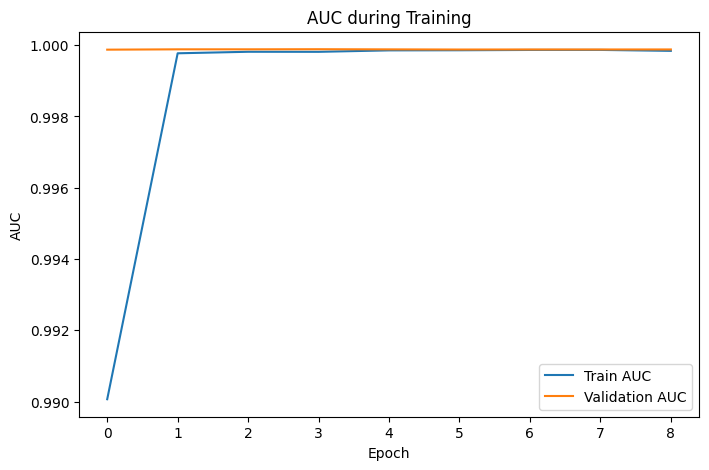

In [83]:

# Plot the AUC over epochs.
plt.figure(figsize=(8,5))
plt.plot(history_AUC.history['auc'], label='Train AUC')
plt.plot(history_AUC.history['val_auc'], label='Validation AUC')
plt.title("AUC during Training")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

use default as much as you can

The defaults of `history` are:

```python
history = model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
we will modify some of them to :
'#                     epochs=50,:
'#                     batch_size=32,
'#                     validation_data=(X_val , y_val ),
'#                     callbacks=[early_stop],:
'#                     shuffle=False)  # Ensure data is not shuffled:<br>


<h1>Neural Network with list of Hyperparameters</h1>

<h2>set lists of running parameters</h2>

In [84]:
# learning_rates = [0.001]
# batch_sizes = [32]
# epoch_list = [2]

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epoch_list = [30, 50, 70] 

<h3> Train the NN with diffrent  Hyperparameters</h3>

In [85]:
results = {}
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epoch_list:
 # for rvery combination reset seed and renew the split to stratify           
            set_seed(42)
            X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
            y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()
            # Define a simple MLP model
            model_tune = Sequential([
                Input(shape=(X_train.shape[1],)), # Use Input layer to define input shape
                Dense(64, activation='relu'), # Remove input_shape from Dense layer
                Dropout(0.2),
                Dense(32, activation='relu'),
                Dense(class_counts, activation='softmax')
            ])

            model_tune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),                    
             loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Recall(name="recall")])
            
            ## Train the model with early stopping (rest of your training code remains the same)
            early_stop = EarlyStopping(monitor='val_recall', patience=5, mode='max', restore_best_weights=True)
            # for running full epoc as defined we disable early stop
            #early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            history_tune= model_tune.fit(X_train , y_tr_cat ,
                    epochs=epoch,
                    batch_size=batch,
                    validation_data=(X_val , y_v_cat ),
                    callbacks=[early_stop])
            
            test_loss, test_acc, test_recal = model_tune.evaluate(X_test , y_tst_cat, verbose=0)
            results[(lr, batch, epochs)] = test_acc
            print(f"LR: {lr}, Batch: {batch}, Epochs: {epochs} => Test Acuracy: {test_acc:.2%}")

Epoch 1/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7307 - loss: 1.2306 - recall: 0.4970 - val_accuracy: 0.9651 - val_loss: 0.0773 - val_recall: 0.9616
Epoch 2/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1013 - recall: 0.9521 - val_accuracy: 0.9666 - val_loss: 0.0655 - val_recall: 0.9646
Epoch 3/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9618 - loss: 0.0886 - recall: 0.9574 - val_accuracy: 0.9641 - val_loss: 0.0662 - val_recall: 0.9623
Epoch 4/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.0771 - recall: 0.9595 - val_accuracy: 0.9621 - val_loss: 0.0674 - val_recall: 0.9606
Epoch 5/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9633 - loss: 0.0782 - recall: 0.9604 - val_accuracy: 0.9638 - val_loss: 0.0658 - val_recall: 0.9616
Epoch 6/50
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9623 - loss: 0.0755 - recall: 0.9607 - val_accuracy: 0.9638 - val_loss: 0.0621 - val_recall:

In [86]:
best_params = max(results, key=results.get)
print(f"Best hyperparameters (learning rate, batch size, epochs): {best_params} with test accuracy  : {results[best_params]:.2%}")

Best hyperparameters (learning rate, batch size, epochs): (0.01, 32, 30) with test accuracy  : 96.33%


<h2>retrain the best parametrs</h2>

<h3> Find the best hyperparameter combination based on the highest accuracy</h3>

In [87]:
best_params = max(results, key=results.get)

# If best_params is a tuple (e.g., (learning_rate, batch_size, epochs)), unpack it
if isinstance(best_params, tuple):
    lrb, batch_size, epochs = best_params  # Unpack the values into separate variables
    
    # Now, you can print each variable separately
    print(f"Learning Rate: {lrb}")
    print(f"Batch Size: {batch_size}")
    print(f"Epochs: {epochs}")
else:
    print(f"Best hyperparameter: {best_params}")

Learning Rate: 0.01
Batch Size: 32
Epochs: 30


<h2> Re Train the NN with best Hyperparameters </h2>

In [88]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

<h3>define the model</h3>

In [89]:
# Define a simple MLP model
model_Best = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer to define input shape
    Dense(64, activation='relu'), # Remove input_shape from Dense layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(class_counts, activation='softmax')
])
model_Best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrb),                    
             loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Recall(name="recall")])

<h3> Train the model with early stopping based on max recall</h3>

In [90]:
## Train the model with early stopping (rest of your training code remains the same)
early_stop = EarlyStopping(monitor='val_recall', patience=5, mode='max', restore_best_weights=True)

history_Best= model_Best.fit(X_train , y_tr_cat ,
                    epochs=epoch,
                    batch_size=batch_size,
                    validation_data=(X_val , y_v_cat ),
                    callbacks=[early_stop])


Epoch 1/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8529 - loss: 0.5214 - recall: 0.7838 - val_accuracy: 0.9561 - val_loss: 0.1057 - val_recall: 0.9516
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1101 - recall: 0.9528 - val_accuracy: 0.9568 - val_loss: 0.1016 - val_recall: 0.9538
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1060 - recall: 0.9548 - val_accuracy: 0.9611 - val_loss: 0.0907 - val_recall: 0.9583
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.0983 - recall: 0.9586 - val_accuracy: 0.9606 - val_loss: 0.0966 - val_recall: 0.9576
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9607 - loss: 0.0926 - recall: 0.9580 - val_accuracy: 0.9626 - val_loss: 0.0775 - val_recall: 0.9601
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.0896 - recall: 0.9570 - val_accuracy: 0.9633 - val_loss: 0.0774 - val_recall: 0.9613
Epoc

<h3>Evaluate the model</h3>

In [91]:
# Evaluate on test set (rest of your evaluation code remains the same)
results = model_Best.evaluate(X_test, y_tst_cat, verbose=0)
print("Neural Network Test Loss: {:.4f}".format(results[0]))  # Loss
print("Neural Network Test Accuracy: {:.2%}".format(results[1]))  # Accuracy
print("Neural Network Test Recall: {:.2%}".format(results[2]))  # Recall

# nn_best_loss, nn_best_accuracy = model_Best.evaluate(X_test , y_tst_cat , verbose=0)
# print("Neural Network Test Accuracy: {:.2%}".format(nn_accuracy))

Neural Network Test Loss: 0.0732
Neural Network Test Accuracy: 96.33%
Neural Network Test Recall: 96.13%


<h3> classification reprt NN with default Hyperparameters early_stop monitor='val_recall'</h3>

In [92]:
Accuracy_NN_Recal = accuracy_score(y_test, y_pred_NN_Recall) * 100
Precision_NN_Recal=precision_score(y_test, y_pred_NN_Recall, average='macro') * 100
Recall_NN_Recal=recall_score(y_test, y_pred_NN_Recall, average='macro') * 100
F1_NN_Recal=f1_score(y_test, y_pred_NN_Recall, average='macro')

# Compute and print evaluation metrics
print("\n=== Model Evaluation Metrics ===")
print("Accuracy: {:.2f}%".format(Accuracy_NN_Recal))
print("Precision: {:.2f}%".format(Precision_NN_Recal))
print("Recall: {:.2f}%".format(Recall_NN_Recal))
print("F1 Score (macro): {:.4f}".format(F1_NN_Recal))

#print("Classification Report:")
print("Default NN_Recall Performance:")


# Compute precision, recall, and F1-score
print(classification_report(y_test, y_pred_NN_Recall))


=== Model Evaluation Metrics ===
Accuracy: 96.16%
Precision: 96.35%
Recall: 96.15%
F1 Score (macro): 0.9613
Default NN_Recall Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.98      0.97      0.98       181
           2       0.92      0.91      0.91       182
           3       1.00      1.00      1.00       182
           4       1.00      0.98      0.99       183
           5       0.95      0.99      0.97       182
           6       0.97      0.98      0.98       182
           7       1.00      1.00      1.00       182
           8       0.99      0.99      0.99       182
           9       1.00      0.99      0.99       182
          10       1.00      0.99      0.99       183
          11       0.99      0.95      0.97       182
          12       1.00      1.00      1.00       182
          13       0.99      0.97      0.98       182
          14       0.95      0.98      0.96      

<h3>Print classification report for NN with Best Hyperparameters early_stop monitor='val_recal'</h3>

In [93]:
# Get model predictions
y_pred_prob = model_Recal.predict(X_test)  # Get probability outputs
y_pred_NN_Best = y_pred_prob.argmax(axis=1)  # Convert probabilities to class labels

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [94]:
Accuracy_NN_Best = accuracy_score(y_test, y_pred_NN_Best) * 100
Precision_NN_Best=precision_score(y_test, y_pred_NN_Best, average='macro') * 100
Recall_NN_Best=recall_score(y_test, y_pred_NN_Best, average='macro') * 100
F1_NN_Best=f1_score(y_test, y_pred_NN_Best, average='macro')

# Compute and print evaluation metrics
print("\n=== Model Evaluation Metrics ===")
print("Accuracy: {:.2f}%".format(Accuracy_NN_Best))
print("Precision: {:.2f}%".format(Precision_NN_Best))
print("Recall: {:.2f}%".format(Recall_NN_Best))
print("F1 Score (macro): {:.4f}".format(F1_NN_Best))

#print("Classification Report:")
print("Default NN_Best_Recall Performance:")


# Compute precision, recall, and F1-score
print(classification_report(y_test, y_pred_NN_Best))


=== Model Evaluation Metrics ===
Accuracy: 96.16%
Precision: 96.35%
Recall: 96.15%
F1 Score (macro): 0.9613
Default NN_Best_Recall Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.98      0.97      0.98       181
           2       0.92      0.91      0.91       182
           3       1.00      1.00      1.00       182
           4       1.00      0.98      0.99       183
           5       0.95      0.99      0.97       182
           6       0.97      0.98      0.98       182
           7       1.00      1.00      1.00       182
           8       0.99      0.99      0.99       182
           9       1.00      0.99      0.99       182
          10       1.00      0.99      0.99       183
          11       0.99      0.95      0.97       182
          12       1.00      1.00      1.00       182
          13       0.99      0.97      0.98       182
          14       0.95      0.98      0.96 

<h3> add this model NN_Best results to metric df</h3>

In [95]:
new_row = {
    'Model': 'Best NN Recall',
    'Accuracy': Accuracy_NN_Best,
    'Precision': Precision_NN_Best,
    'Recall': Recall_NN_Best,
    'F1 Score': F1_NN_Best
}
df_metrics.loc[len(df_metrics)] = new_row

# Format only Accuracy, Precision, Recall, and also F1 Score as a number
columns_to_format = ["Accuracy", "Precision", "Recall","F1 Score"]  # 
df_metrics.loc[len(df_metrics) - 1, columns_to_format] = (
    df_metrics.loc[len(df_metrics) - 1, columns_to_format]
    .astype(float)  # Ensure numeric type
    .map(lambda x: f"{x:.2f}%")  # Format as percentage
)


print(df_metrics)

              Model Accuracy Precision  Recall F1 Score
0      Simple split    0.00%   100.00%   0.00%      0.0
1    Stratify split   95.56%    95.57%  95.56%    0.96%
2  Defult NN Recall   96.16%    96.35%  96.15%    0.96%
3    Defult NN Loss   96.01%    96.10%  96.00%    0.96%
4     Defult NN AUC   96.16%    96.35%  96.15%    0.96%
5    Best NN Recall   96.16%    96.35%  96.15%    0.96%


<h3>pc time</h3>

In [96]:
print("end of main",datetime.now().strftime("%H:%M:%S"))
end_time = time.time()
elapsed_time = end_time - start_time# Calculates the total time taken in seconds.
print(f"Total execution time: {elapsed_time:.2f} seconds")#  Displays the execution time, rounded to 2 decimal places.
formatted_elapsed_time = str(timedelta(seconds=elapsed_time))
print(f"Total execution time: {formatted_elapsed_time}")

end of main 03:05:43
Total execution time: 653.11 seconds
Total execution time: 0:10:53.111332


<h2>PCA</h2>

<h3>PCA renew data and reset seed</h3>

In [97]:
from sklearn.decomposition import PCA
set_seed(42)

<h3>Apply PCA to reduce dimensions to 2 for visualization</h3>

In [98]:
#Apply PCA to reduce dimensions to 2 for visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

<h3> Visualize the 2D projection of the training data</h3>

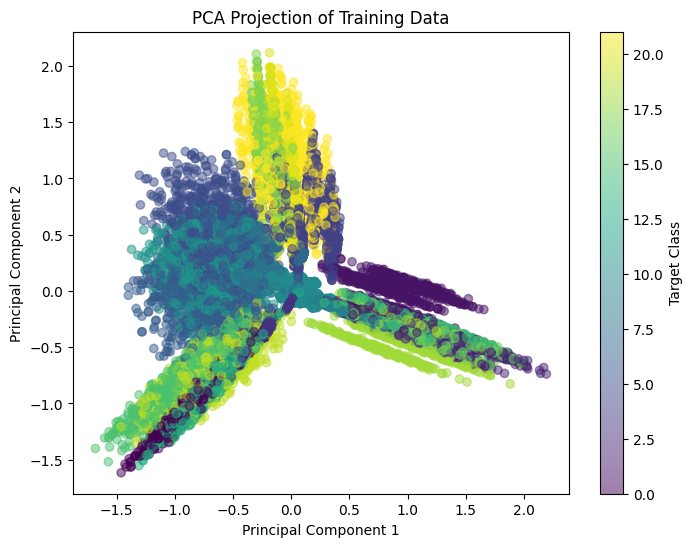

In [99]:
# Visualize the 2D projection of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Training Data')
plt.show()

<h3> Visualize explained variance ratio</h3>

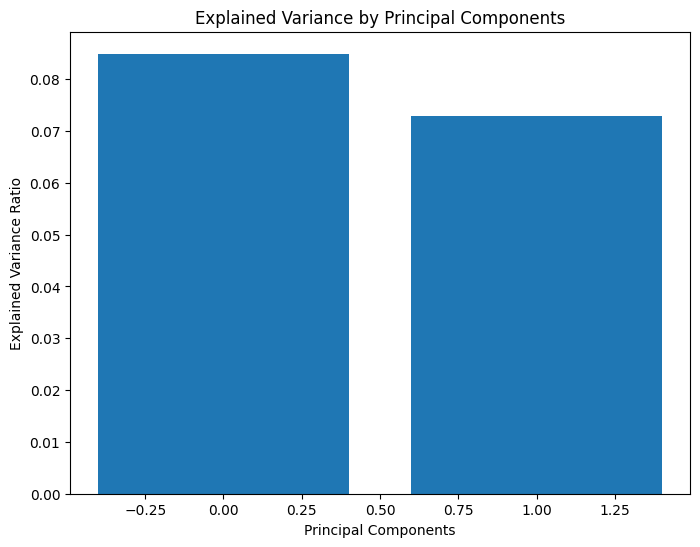

In [100]:
# Visualize explained variance ratio
explained_variance = pca_2d.explained_variance_ratio_

#explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

<h3> Apply PCA to retain 95% variance and Visualization</h3>

In [101]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("Original feature shape:", X_train.shape)
print("Reduced feature shape:", X_train_pca.shape)

# Train a Decision Tree on the PCA-reduced data
dt_clf_pca = DecisionTreeClassifier(random_state=42)
dt_clf_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_clf_pca.predict(X_test_pca)
acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
#print("Accuracy: {:.2f}%".format(accuracy_simple))

print("Decision Tree Accuracy on PCA-reduced data: {:.2f}%".format(acc_dt_pca))

Original feature shape: (18693, 377)
Reduced feature shape: (18693, 100)
Decision Tree Accuracy on PCA-reduced data: 0.94%


<h3> show how shape was reduced</h3>
Actually 277 columns were deleted

In [102]:
print("Original feature shape:", X_train.shape)
print("Reduced feature shape:", X_train_pca.shape)
print ("number of reduced predictors ",X_train.shape[1]-X_train_pca.shape[1])

Original feature shape: (18693, 377)
Reduced feature shape: (18693, 100)
number of reduced predictors  277


<h3> 3D Visualization of PCA-reduced data<h3>

In [103]:
!pip install plotly
import plotly.express as px

# Convert PCA result into a DataFrame
df_pca = pd.DataFrame(X_train_pca, columns=[f"Principal Component {i+1}" for i in range(X_train_pca.shape[1])])

# Add the target variable (y_train) to the DataFrame
df_pca["target"] = y_train  # ✅ Fix: No `.values`

# Create the 3D scatter plot
fig = px.scatter_3d(df_pca, 
                    x="Principal Component 1", 
                    y="Principal Component 2", 
                    z="Principal Component 3", 
                    color="target", 
                    color_continuous_scale="viridis")  

# Update layout to make the figure wider and taller
fig.update_layout(
    width=1000,  # Adjust width
    height=800   # Adjust height
)

# Show the figure
fig.show()


<h1> 10. Dataset Modification for Performance Degradation</h1>


<h2> renew data and reset seed</h2>

In [104]:
set_seed(42)
X_train, X_val, X_test, y_train, y_val, y_test = copy_startify()
y_tr_cat, y_v_cat, y_tst_cat = copy_start_cat()

<h2> Randomly remove 50% portion of the data</h2>

In [105]:
# Example: Randomly remove a significant portion of the data (simulate data loss)
print("source of data shape is:",data_df.shape)
data_degraded = data_df.sample(frac=0.5, random_state=42)
print("data_degraded shape is:",data_degraded.shape)
print("samples reduced", data_df.shape[0] - data_degraded.shape[0])

print("data degrade number of categories", data_df['diseases'].nunique())
data_degraded

source of data shape is: (26705, 378)
data_degraded shape is: (13352, 378)
samples reduced 13353
data degrade number of categories 22


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
866,infectious gastroenteritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25524,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24343,spontaneous abortion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17962,acute bronchitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23206,peripheral nerve disorder,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22724,sprain or strain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11893,pneumonia,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2940,spondylosis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25163,spontaneous abortion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Preprocessing for the degraded dataset<h2>

In [106]:
# --- Preprocessing for the degraded dataset ---
# 1. Create a copy for processing
data_degraded_processed = data_degraded.copy()

<h3> convert categorial to dumies</h3>

### Explanation:
- `pd.get_dummies()`: This is a function from the `pandas` library that is used to convert categorical (non-numeric) columns into multiple binary (0 or 1) columns. This process is called **one-hot encoding**. Each category in the original column gets its own column with binary values: `1` if the record belongs to that category, and `0` otherwise.

- `data_degraded_processed`: This is the DataFrame that you're applying the transformation to. It contains your data, and you want to convert the non-numeric columns into one-hot encoded columns.

- `columns=non_numeric_columns`: This specifies which columns to apply one-hot encoding to. The `non_numeric_columns` is expected to be a list of column names in `data_degraded_processed` that contain categorical data. You only want to apply one-hot encoding to these columns.

- `drop_first=True`: This argument drops the first category in each specified column during the encoding process. This is done to avoid the **dummy variable trap**, which is a problem that can occur when you have multicollinearity in a regression model. By dropping the first category, you remove redundancy, as the first category can be inferred from the other columns.

In [107]:
# 2. One-Hot Encode non-numeric columns (using drop_first to avoid collinearity)
non_numeric_columns = data_degraded_processed.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns in degraded data: {non_numeric_columns}")
print("Shape before one-hot encoding (degraded):", data_degraded_processed.shape)
#data_degraded_processed
print("Kaggle Raw Unique diseases count:", Org_data_df['diseases'].nunique())
print("Our project Unique diseases count:", data_degraded['diseases'].nunique())


print("Our  Unique diseases count:", data_degraded_processed['diseases'].nunique())

#Converts categorical columns into dummy (binary) variables
data_degraded_processed = pd.get_dummies(data_degraded_processed, columns=non_numeric_columns, drop_first=True)

print("Shape after one-hot encoding (degraded):", data_degraded_processed.shape)
# print(data_degraded['diseases'])


Non-numeric columns in degraded data: ['diseases']
Shape before one-hot encoding (degraded): (13352, 378)
Kaggle Raw Unique diseases count: 773
Our project Unique diseases count: 22
Our  Unique diseases count: 22
Shape after one-hot encoding (degraded): (13352, 398)


In [108]:
print(data_degraded['diseases'].unique())  # Check project dataset's categories
#print(non_numeric_columns)  # Verify which columns are being encoded


['infectious gastroenteritis' 'strep throat' 'spontaneous abortion'
 'acute bronchitis' 'peripheral nerve disorder' 'cystitis'
 'gastrointestinal hemorrhage' 'spondylosis'
 'complex regional pain syndrome' 'vaginal cyst' 'diverticulitis'
 'conjunctivitis due to allergy' 'gout' 'fungal infection of the hair'
 'pneumonia' 'vulvodynia' 'hypoglycemia' 'nose disorder' 'esophagitis'
 'marijuana abuse' 'sprain or strain' 'arthritis of the hip']


In [109]:
# use it only at first run to install package: 
!pip install SMOTE
# use it only at first run to install package:
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 3. Frequency-Based Symptom Selection
# Identify dummy columns created for the 'diseases' column
disease_dummy_columns = [col for col in data_degraded_processed.columns if col.startswith('diseases_')]
print("Available disease dummy columns in degraded data:", disease_dummy_columns)

# Choose a disease dummy column; here we attempt 'diseases_Acne', or use the first one available.
if 'diseases_Acne' in disease_dummy_columns:
    disease_column_name = 'diseases_Acne'
elif disease_dummy_columns:
    disease_column_name = disease_dummy_columns[0]
else:
    raise KeyError("No disease dummy columns found in degraded data.")

print(f"Selected disease column: '{disease_column_name}'")

# Calculate symptom frequencies (exclude disease dummy columns)
symptom_columns = data_degraded_processed.columns.drop(disease_dummy_columns)
symptom_frequencies = data_degraded_processed[symptom_columns].mean()
frequency_threshold = 0.05  # Keep symptoms present in at least 5% of the dataset
symptoms_to_keep = symptom_frequencies[symptom_frequencies >= frequency_threshold].index.tolist()

# Define columns to keep: the selected disease column plus the high-frequency symptom columns
columns_to_keep = [disease_column_name] + symptoms_to_keep
print("Columns to keep in degraded data:", columns_to_keep)

# Filter the processed DataFrame
data_degraded_filtered = data_degraded_processed[columns_to_keep]
print("Shape after frequency-based symptom selection (degraded):", data_degraded_filtered.shape)

# 4. Prepare Features and Labels
X_degraded = data_degraded_filtered.drop(columns=[disease_column_name])
y_degraded = data_degraded_filtered[disease_column_name]

# 5. Split the Degraded Dataset into Training and Test Sets
X_train_deg, X_test_deg, y_train_deg, y_test_deg = train_test_split(
    X_degraded, y_degraded, test_size=0.2, random_state=42
)
print("Degraded training set shape:", X_train_deg.shape)
print("Degraded test set shape:", X_test_deg.shape)

# 6. Balance the Training Set using SMOTE
# Adjust k_neighbors based on the minority class size if necessary.
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_deg_bal, y_train_deg_bal = sm.fit_resample(X_train_deg, y_train_deg)
print("Balanced degraded training set class distribution:", Counter(y_train_deg_bal))

# 7. Train a Cost-Sensitive Random Forest on the Degraded Dataset
rf_classifier_deg = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)
rf_classifier_deg.fit(X_train_deg_bal, y_train_deg_bal)

# 8. Evaluate the Model on the Degraded Test Set
y_pred_deg = rf_classifier_deg.predict(X_test_deg)
print("Classification report on degraded data:")


Available disease dummy columns in degraded data: ['diseases_arthritis of the hip', 'diseases_complex regional pain syndrome', 'diseases_conjunctivitis due to allergy', 'diseases_cystitis', 'diseases_diverticulitis', 'diseases_esophagitis', 'diseases_fungal infection of the hair', 'diseases_gastrointestinal hemorrhage', 'diseases_gout', 'diseases_hypoglycemia', 'diseases_infectious gastroenteritis', 'diseases_marijuana abuse', 'diseases_nose disorder', 'diseases_peripheral nerve disorder', 'diseases_pneumonia', 'diseases_spondylosis', 'diseases_spontaneous abortion', 'diseases_sprain or strain', 'diseases_strep throat', 'diseases_vaginal cyst', 'diseases_vulvodynia']
Selected disease column: 'diseases_arthritis of the hip'
Columns to keep in degraded data: ['diseases_arthritis of the hip', 'shortness of breath', 'sharp chest pain', 'dizziness', 'abnormal involuntary movements', 'sore throat', 'cough', 'nasal congestion', 'leg pain', 'blood in stool', 'sharp abdominal pain', 'vomiting',

<h1>print end project time</h1>

In [110]:
print("end of main",datetime.now().strftime("%H:%M:%S"))
end_time = time.time()
elapsed_time = end_time - start_time# Calculates the total time taken in seconds.
print(f"Total execution time: {elapsed_time:.2f} seconds")#  Displays the execution time, rounded to 2 decimal places.
formatted_elapsed_time = str(timedelta(seconds=elapsed_time))
print(f"Total execution time: {formatted_elapsed_time}")

end of main 03:05:59
Total execution time: 669.75 seconds
Total execution time: 0:11:09.746140
